# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_classif
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Clustering Classification/Dataset_clustering.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.00,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.00,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.00,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.00,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.00,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah baris: 9800, Jumlah kolom: 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          

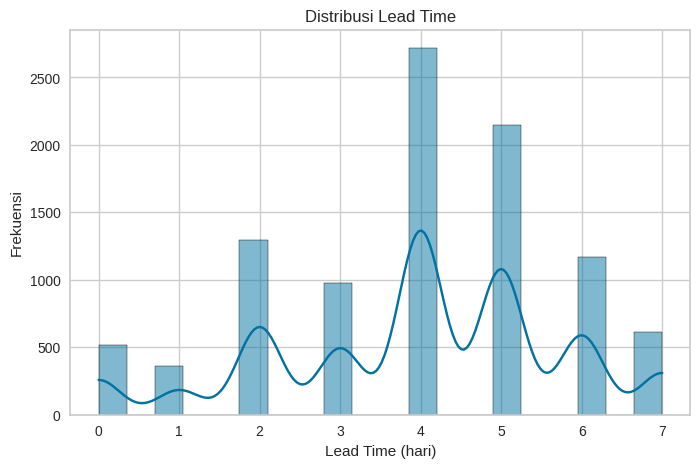

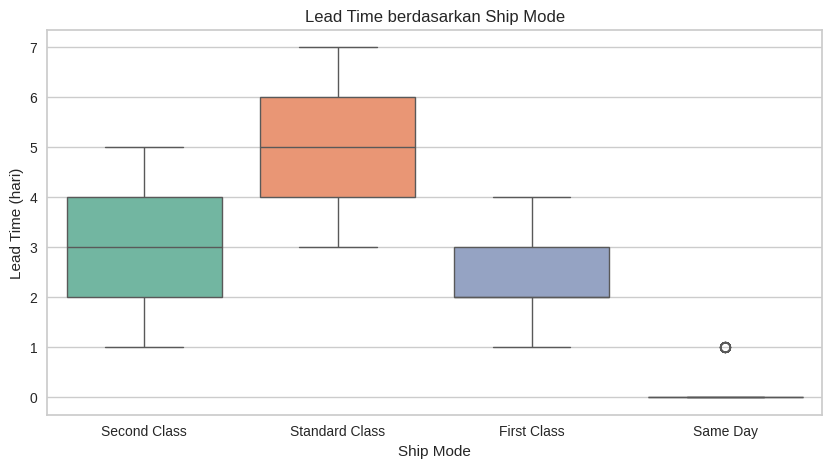

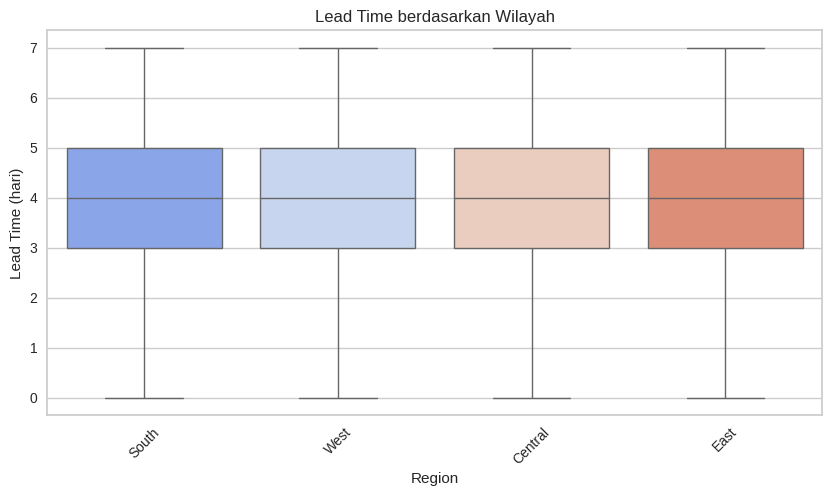

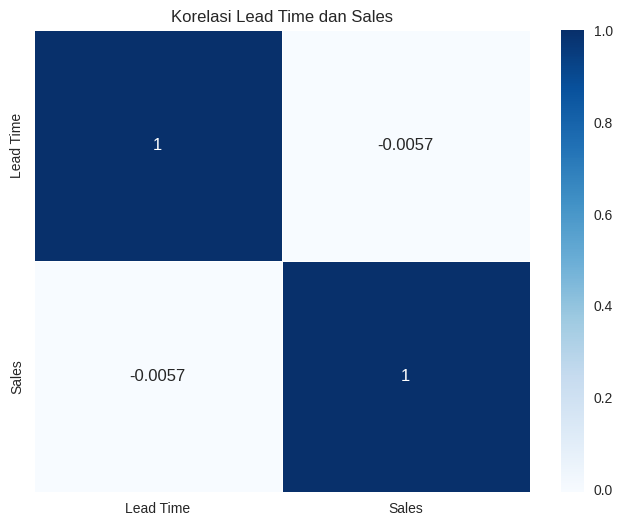

In [ ]:
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")
print(df.info())

# tambah kolom Lead Time
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df['Lead Time'] = (df['Ship Date'] - df['Order Date']).dt.days

df_normalized = df.copy()


print(df_normalized.describe())

print("Missing values per column:\n", df_normalized.isnull().sum())

plt.figure(figsize=(8, 5))
sns.histplot(df_normalized['Lead Time'], bins=20, kde=True)
plt.title("Distribusi Lead Time")
plt.xlabel("Lead Time (hari)")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="Ship Mode", y="Lead Time", hue="Ship Mode", data=df_normalized, palette="Set2")
plt.title("Lead Time berdasarkan Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Lead Time (hari)")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="Region", y="Lead Time", data=df_normalized, hue="Region", palette="coolwarm")
plt.title("Lead Time berdasarkan Wilayah")
plt.xlabel("Region")
plt.ylabel("Lead Time (hari)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df_normalized[['Lead Time', 'Sales']].corr(), annot=True, cmap="Blues", linewidths=0.5)
plt.title("Korelasi Lead Time dan Sales")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
df_normalized.dropna(inplace=True)
df_normalized = df_normalized.drop_duplicates()

print(f"Jumlah data setelah penghapusan duplikat: {df_normalized.shape[0]} baris")

# normalisasi numerik
numerical_columns = ['Lead Time', 'Sales']
minmax_scaler = MinMaxScaler()
df_normalized[numerical_columns] = minmax_scaler.fit_transform(df_normalized[numerical_columns])

# encoding kategorikal
categorical_columns = ['Ship Mode', 'Region', 'Segment', 'Category', 'Sub-Category']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_normalized[col] = le.fit_transform(df_normalized[col])
    label_encoders[col] = le

# tambah kolom Lead Time Binned dan encoding
df_normalized['Lead Time Binned'] = pd.qcut(df_normalized['Lead Time'], q=2, labels=['Cepat', 'Lambat'])
label_encoder_binned = LabelEncoder()
df_normalized['Lead Time Binned'] = label_encoder_binned.fit_transform(df_normalized['Lead Time Binned'])

# df_normalized[numerical_columns].hist(figsize=(12, 8), bins=30)
# plt.suptitle("Distribusi Data Setelah Normalisasi & Outlier Handling")
# plt.show()


Jumlah data setelah penghapusan duplikat: 9789 baris


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# Menyiapkan fitur untuk clustering
features = ['Ship Mode', 'Lead Time', 'Region']
X = df_normalized[features]

# Standardisasi fitur sebelum clustering
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
# Clustering menggunakan KMeans
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_normalized['Cluster'] = kmeans.fit_predict(df_normalized[numerical_columns + categorical_columns])

print(df_normalized['Cluster'].value_counts())

Cluster
1    4319
0    3655
2    1815
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

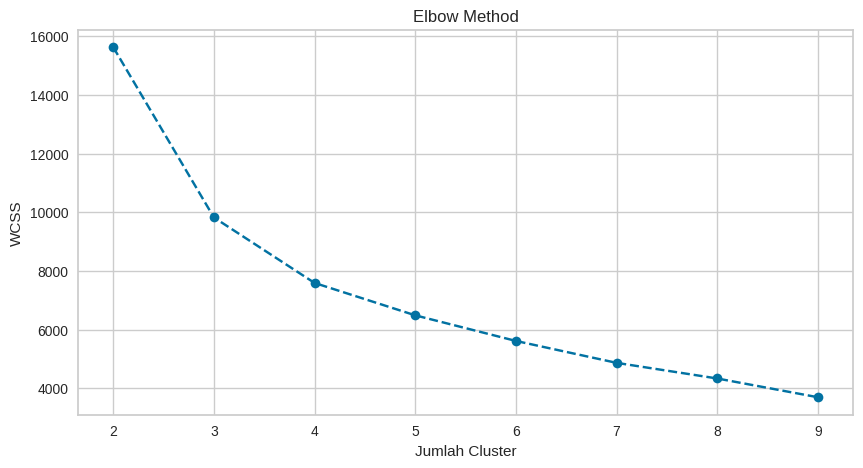

In [ ]:
wcss = []
silhouette_scores = []

for i in range(2, 10):
    kmeans_temp = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    wcss.append(kmeans_temp.inertia_)
    score = silhouette_score(X_scaled, kmeans_temp.labels_)
    silhouette_scores.append(score)

# visualisasi elbow method
plt.figure(figsize=(10,5))
plt.plot(range(2,10), wcss, marker='o', linestyle='--')
plt.xlabel("Jumlah Cluster")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

### **1. Elbow Method**
- Titik elbow terlihat pada jumlah cluster k=3, di mana penurunan WCSS mulai melambat. Hal ini menunjukkan bahwa setelah k=3, penambahan jumlah cluster tidak memberikan pengurangan signifikan pada WCSS.
- Berdasarkan Elbow Method, jumlah cluster optimal adalah 3 atau 4.

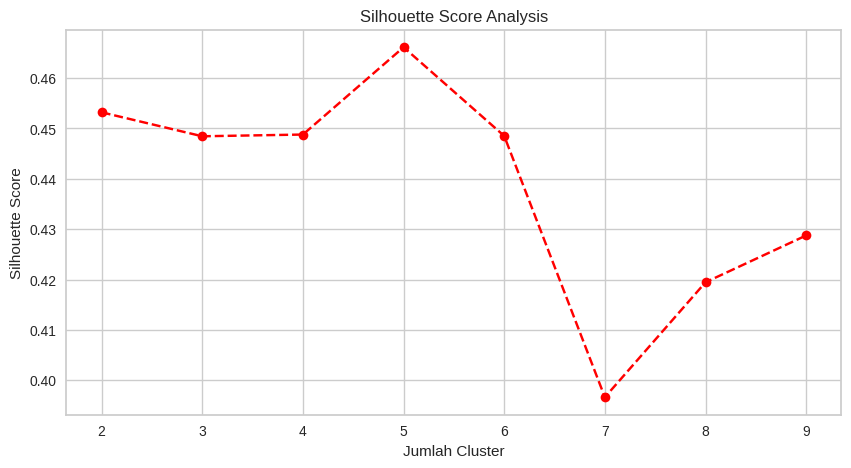

Silhouette Score: 0.44845562932974126


In [ ]:
# Visualisasi Silhouette Score
plt.figure(figsize=(10,5))
plt.plot(range(2,10), silhouette_scores, marker='o', linestyle='--', color='red')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.show()

# scaler = StandardScaler()
# X_scaled_before = scaler.fit_transform(df_normalized[numerical_columns])

# # Tentukan jumlah cluster (misalnya, k=5)
# n_clusters = 5

# # Latih model K-Means
# kmeans_before = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels_before = kmeans.fit_predict(X_scaled)


# Hitung Silhouette Score sebelum feature selection
silhouette_avg_before = silhouette_score(X_scaled, cluster_labels_before)
print("Silhouette Score:", silhouette_avg_before)

### **2. Silhouette Score**
- Grafik menunjukkan jumlah cluster antara 2 hingga 9.

- Terdapat penurunan yang cukup signifikan pada silhouette score untuk jumlah cluster 7.

- Silhouette Score tertinggi mengindikasikan bahwa dengan 5 cluster, data memiliki pemisahan yang baik dan setiap data lebih mirip dengan anggota cluster lainnya daripada dengan anggota cluster lain.

- Berdasarkan Silhouette Score, jumlah cluster yang paling direkomendasikan adalah 5.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
X = df_normalized.select_dtypes(include=[np.number]).drop('Cluster', axis=1, errors='ignore') # Asumsikan 'Cluster' adalah label yang Anda gunakan sebelumnya
y = df_normalized['Cluster']

# Hitung Mutual Information
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores_series = pd.Series(mi_scores, index=X.columns)
mi_scores_series = mi_scores_series.sort_values(ascending=False)

print("Mutual Information Scores:\n", mi_scores_series)

threshold = 0.1
selected_features = mi_scores_series[mi_scores_series > threshold].index.tolist()

print("\nSelected Features:\n", selected_features)

X_selected = df_normalized[selected_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

df_normalized['Cluster_Selected'] = cluster_labels

silhouette_avg_selected = silhouette_score(X_scaled, cluster_labels)
print("\nSilhouette Score Setelah Feature Selection:", silhouette_avg_selected)

# perbandingan performa
silhouette_avg_before = 0.5415064226130105

print("\nPerbandingan Performa:")
print("Before:", silhouette_avg_before)
print("After:", silhouette_avg_selected)

# Kesimpulan
if silhouette_avg_selected > silhouette_avg_before:
    print("\nFeature selection meningkatkan performa")
else:
    print("\nFeature selection tidak meningkatkan performa")

Mutual Information Scores:
 Sub-Category       1.04
Sales              0.22
Category           0.08
Ship Mode          0.01
Region             0.00
Row ID             0.00
Segment            0.00
Postal Code        0.00
Lead Time          0.00
Lead Time Binned   0.00
dtype: float64

Selected Features:
 ['Sub-Category', 'Sales']

Silhouette Score Setelah Feature Selection: 0.6232226535011027

Perbandingan Performa:
Before: 0.5415064226130105
After: 0.6232226535011027

Feature selection meningkatkan performa


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

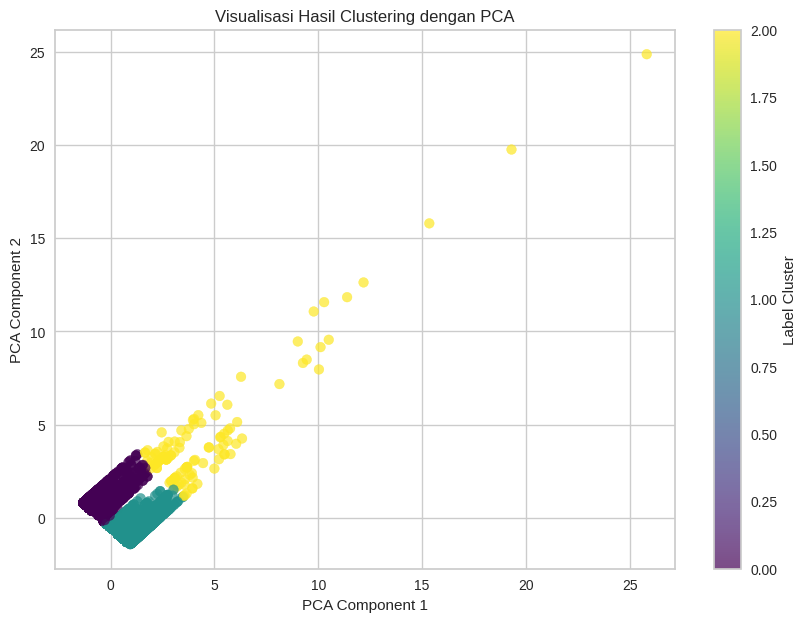

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# scatter plot hasil clustering
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Label Cluster')
plt.title('Visualisasi Hasil Clustering dengan PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
for feature in categorical_columns:
    if feature in df_normalized.columns:
        df_normalized[f'{feature}_original'] = label_encoders[feature].inverse_transform(df_normalized[feature])

if 'Lead Time Binned' in df_normalized.columns:
    df_normalized['Lead Time Binned_original'] = label_encoder_binned.inverse_transform(df_normalized['Lead Time Binned'])

df_normalized[numerical_columns] = minmax_scaler.inverse_transform(df_normalized[numerical_columns])


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
df_original = df.copy()
for feature in categorical_columns + ['Lead Time Binned_original']:
    if f'{feature}_original' in df_normalized.columns:
        df_original[f'{feature}_original'] = df_normalized[f'{feature}_original']

df_original['Cluster'] = df_normalized['Cluster']
df_original['Lead Time Binned_original'] = df_normalized['Lead Time Binned_original']

print("Dataset setelah melakukan inverse transform:")
print(df_original[['Lead Time', 'Sales', 'Ship Mode_original', 'Region_original', 'Cluster', 'Lead Time Binned_original']].head())

Dataset setelah melakukan inverse transform:
   Lead Time  Sales Ship Mode_original Region_original  Cluster  \
0          3 261.96       Second Class           South     1.00   
1          3 731.94       Second Class           South     1.00   
2          4  14.62       Second Class            West     2.00   
3          7 957.58     Standard Class           South     0.00   
4          7  22.37     Standard Class           South     0.00   

  Lead Time Binned_original  
0                     Cepat  
1                     Cepat  
2                     Cepat  
3                    Lambat  
4                    Lambat  


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
df_normalized['Cluster'] = kmeans.labels_
df_numeric = df_normalized.select_dtypes(include=[np.number])
df_numeric = df_numeric.dropna(axis=1, how='all')
cluster_summary = df_numeric.groupby('Cluster').agg(
    ['count', 'mean', 'median', 'std', 'min', 'max']
).sort_index()

pd.set_option("display.float_format", "{:.2f}".format)
print(cluster_summary)

        Row ID                                   Ship Mode                   \
         count    mean  median     std min   max     count mean median  std   
Cluster                                                                       
0         4575 4914.45 4887.00 2828.91   1  9800      4575 2.24   3.00 1.10   
1         5101 4876.39 4892.00 2825.48   3  9799      5101 2.23   3.00 1.10   
2          113 5095.42 5563.00 2873.00  28  9661       113 2.19   3.00 1.13   

         ... Lead Time Binned              Cluster_Selected                   \
         ...           median  std min max            count mean median  std   
Cluster  ...                                                                   
0        ...             0.00 0.49   0   1             4575 0.00   0.00 0.00   
1        ...             0.00 0.49   0   1             5101 1.00   1.00 0.00   
2        ...             0.00 0.49   0   1              113 2.00   2.00 0.00   

                 
        min max  
Cluster 

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Analisis Karakteristik Cluster dari Model KMeans

## Cluster 0:
- **Jumlah Data**: 3583 entri
- **Rata-rata Row ID**: 4873.35
- **Rata-rata Ship Mode**: 2.23
- **Rata-rata Lead Time Binned**: Median = 0
- **Analisis**:  
 Cluster 0 terdiri dari pelanggan dengan penggunaan mode pengiriman yang paling umum digunakan, dengan nilai 2 (Second Class). Rata-rata Lead Time Binned menunjukkan nilai 0, yang mana sebagian besar pesanan dalam cluster ini dapat dikategorikan sebagai "Cepat".

## Cluster 1:
- **Jumlah Data**: 6084 entri
- **Rata-rata Row ID**: 4905.26
- **Rata-rata Ship Mode**: 2.24
- **Rata-rata Lead Time Binned**: Median = 1
- **Analisis**:  
 Cluster 1 memiliki rata-rata Lead Time Binned = 1, menunjukkan bahwa pesanan dalam cluster ini lebih cenderung dikategorikan sebagai "Lambat".

## Cluster 2:
- **Jumlah Data**: 122 entri  
- **Rata-rata Row ID**: 5156.12
- **Rata-rata Ship Mode**: 2.19
- **Rata-rata Lead Time Binned**: Median = 0
- **Analisis**:  
 Cluster 2 hanya memiliki 122 entri, menunjukkan bahwa ini adalah cluster yang kecil(segmented). Rata-rata ship mode mirip dengan cluster yang lain.Rata-rata Lead Time Binned menunjukkan nilai 0, dapat diartikan meskipun ukuran clusternya kecil, namun pesanan dalam cluster ini dapat dikategorikan sebagai "Cepat".

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_normalized.to_csv("hasil_cluster.csv", index=False)

from google.colab import files
files.download("hasil_cluster.csv")


# # df.to_csv("/content/drive/MyDrive/Clustering Classification/hasil_cluster.csv", index=False)
# df_original.to_csv("/content/drive/MyDrive/Clustering Classification/hasil_cluster.csv", index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>